In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
import math
import csv

# Import EDD utils to import study as pandas dataframe
from edd_utils import login, export_study

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from datetime import datetime
import seaborn as sns; sns.set(color_codes=True)
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import HBox, Label, Layout ,Button,AppLayout, jslink, IntText, IntSlider
import matplotlib.colors as mcolors
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly
%matplotlib inline

In [3]:
def detect_stationary_phase(y_values, threshold=0.1, consecutive_points=50):
    """
    Detects the y-value where the curve stops changing and reaches steady-state.
    
    Parameters:
    y_values: list or np.array of y-axis values (growth curve)
    threshold: float, the difference considered small enough to be considered no change
    consecutive_points: int, number of consecutive points with small change to confirm steady-state
    
    Returns:
    steady_state_value: float, the y-value at the stationary phase (steady-state)
    """
    # Calculate the absolute difference between consecutive points
    slope = np.abs(np.diff(y_values))
    
    # Find indices where the slope is below the threshold
    steady_state_indices = np.where(slope < threshold)[0]
    
    # Check if there are consecutive points that meet the criteria
    for i in range(len(steady_state_indices) - consecutive_points + 1):
        # Check if the next few points are also below the threshold
        if np.all(np.diff(steady_state_indices[i:i + consecutive_points]) == 1):
            # Return the first y-value where steady-state begins
            return y_values[steady_state_indices[i] + 1]
    
    return None  # Return None if no steady-state is found

('Control-R1', 3.12)
('PP_4549-R1', 3.12)
('PP_4550-R1', 2.97)
('PP_0368-R1', 3.15)
('PP_2136-R1', 3.29)
('PP_0774-R1', 2.96)
('PP_0362-R1', 2.99)
('PP_0437-R1', 3.13)
('Control-R2', 3.31)
('PP_4549-R2', 3.13)
('PP_4550-R2', 2.99)
('PP_0368-R2', 3.14)
('PP_2136-R2', 3.2)
('PP_0774-R2', 2.97)
('PP_0362-R2', 3.01)
('PP_0437-R2', 3.61)
('Control-R3', 3.5)
('PP_4549-R3', 3.1)
('PP_4550-R3', 3.05)
('PP_0368-R3', 3.18)
('PP_2136-R3', 3.19)
('PP_0774-R3', 3.21)
('PP_0362-R3', 3.1)
('PP_0437-R3', 3.16)
('PP_2589-R1', 3.11)
('PP_3744-R1', 3.29)
('PP_4194_NT2-R1', 3.03)
('PP_4194_NT3-R1', 3.03)
('PP_1607_NT1-R1', 3.13)
('PP_1607_NT4-R1', 3.04)
('PP_1607_NT1_xylS_Pm-R1', 3.33)
('PP_1607_NT2_xylS_Pm-R1', 4.55)
('PP_2589-R2', 3.3)
('PP_3744-R2', 3.17)
('PP_4194_NT2-R2', 3.04)
('PP_4194_NT3-R2', 3.01)
('PP_1607_NT1-R2', 3.13)
('PP_1607_NT4-R2', 3.09)
('PP_1607_NT1_xylS_Pm-R2', 3.06)
('PP_1607_NT2_xylS_Pm-R2', 3.3)
('PP_2589-R3', 3.43)
('PP_3744-R3', 3.18)
('PP_4194_NT2-R3', 3.13)
('PP_4194_NT3-R3', 

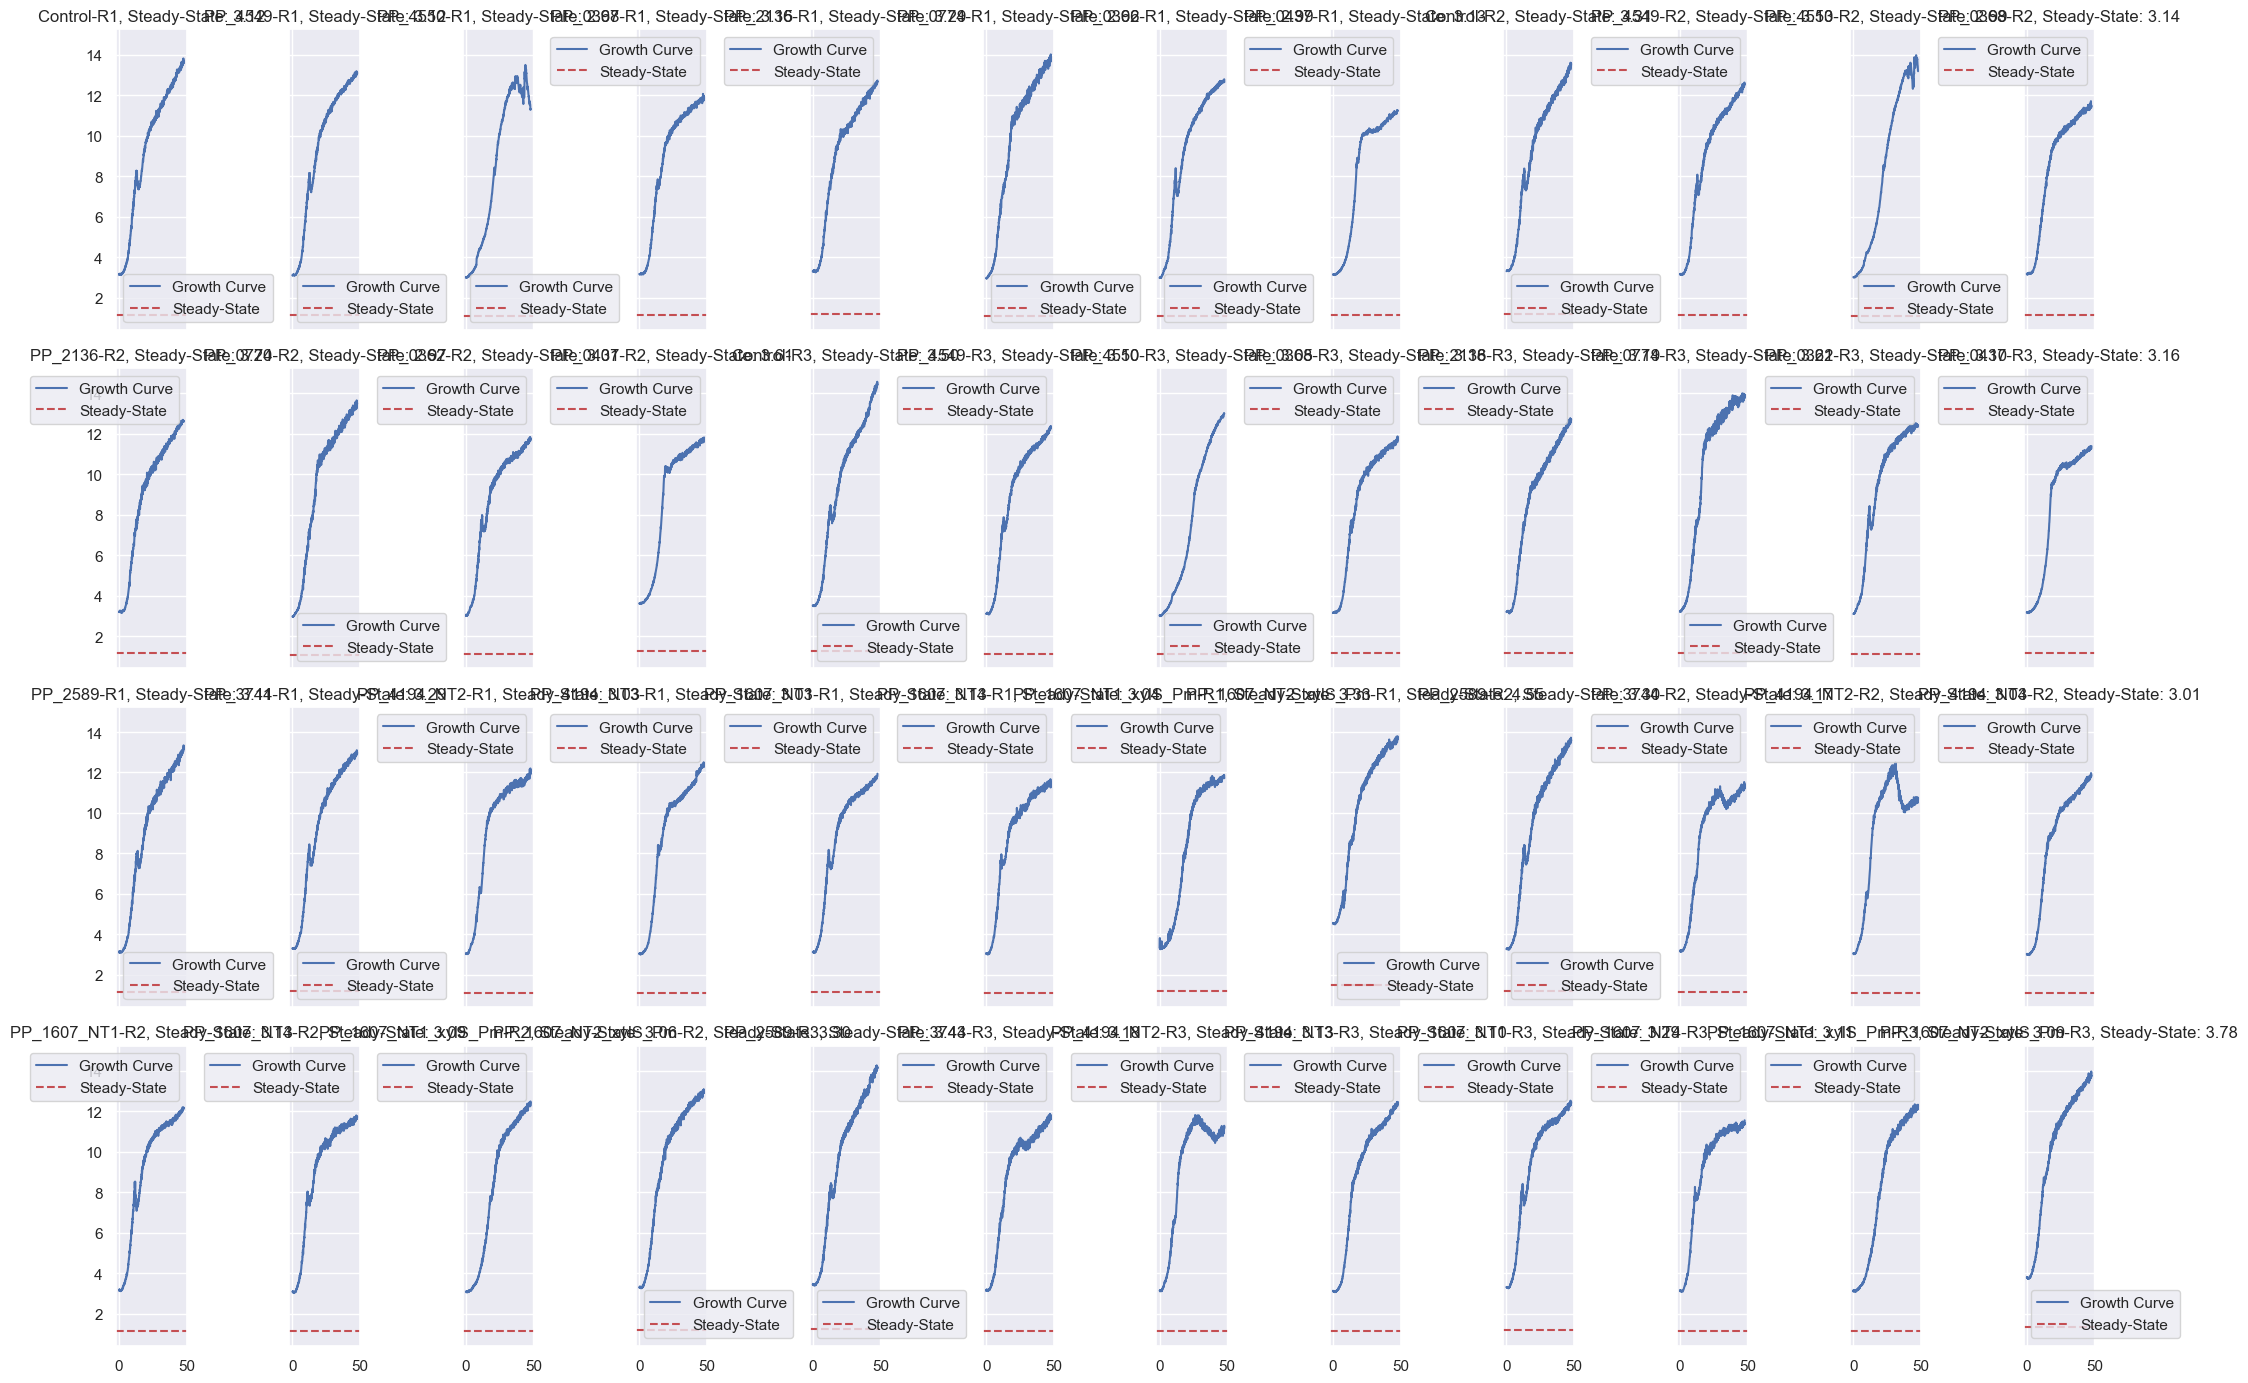

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Assuming detect_stationary_phase is already defined
# Example: detect_stationary_phase(y_values, threshold=1e-3, consecutive_points=5)

FILE = 'DBTL0/DBTL0-1.csv'
df1 = pd.read_csv(FILE)

Line_Name = {}
data = []
strains = df1['Line Name'].unique()
size = len(strains)

# Initialize a list to store results
steady_state_results = []

# Subplot grid calculation
nrow = math.ceil(size / 12)
ncol = 12
fig, axs = plt.subplots(nrow, ncol, figsize=(21, 14), sharey=True, sharex=True)

# Loop over strains and store strain-specific DataFrames
for strain in strains:
    Line_Name[strain] = df1[df1['Line Name'] == strain]

# Loop over strains to calculate and plot steady-state values
for k, strain in enumerate(strains, start=1):
    # Use strain-specific DataFrame to extract 'Value' and 'Time'
    time = Line_Name[strain]['Time']
    
    # Use the correct column to extract y_value
    y_value = Line_Name[strain]['Value'].values

    # Detect the steady-state value where the curve stops changing
    steady_state_value = detect_stationary_phase(y_value, threshold=0.1, consecutive_points=20)
    
    # Append the result (strain, steady-state value)
    steady_state_results.append((strain, steady_state_value))
    
    # Plotting (use appropriate subplot indexing)
    row_idx = (k - 1) // ncol
    col_idx = (k - 1) % ncol
    axs[row_idx, col_idx].plot(time, y_value, label='Growth Curve')
    
    # Add steady-state line on the plot
    axs[row_idx, col_idx].axhline(y=np.log(steady_state_value), color='r', linestyle='--', label='Steady-State')
    
    # Set title for the subplot with steady-state value
    axs[row_idx, col_idx].set_title(f"{strain}, Steady-State: {steady_state_value:.2f}")
    
    # Optionally, add a legend for clarity
    
    axs[row_idx, col_idx].legend()

# Print the steady-state results for each strain
for result in steady_state_results:
    print(result)

plt.tight_layout()
plt.show()
